In [1]:
__publisher__ = 'Global Green Growth Institute'
__author__ = 'GGPM Team'
__model_lead__ = 'H. Luchtenbelt'
__programmer__ = 'S. Zabrocki'
__status__ = 'Pending Validation'

"""
TO DO.
"""
from graphmodels.graphmodel import GraphModel
import pandas as pd


animal_group = ['Bovine Meat', 'Pigmeat', 'Poultry Meat',
                'Eggs', 'Milk - Excluding Butter', 'Meat, Other']

crop_group = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
              'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
              'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
              'Stimulants', 'Spices', 'Alcoholic Beverages']

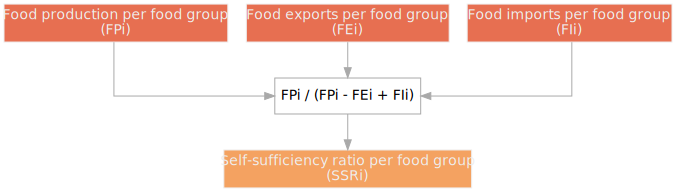

In [2]:
SSRi_nodes = [
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FPi',
     'name': 'Food production per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FEi',
     'name': 'Food exports per food group',
     },

    {'type': 'input',
     'unit': '1000 t',
     'id': 'FIi',
     'name': 'Food imports per food group',
     },
    {'type': 'variable',
     'unit': '%',
     'id': 'SSRi',
     'name': 'Self-sufficiency ratio per food group',
     'in': ['FPi', 'FEi', 'FIi'],
     'computation': {'name': 'FPi / (FPi - FEi + FIi)',
                     'formula': lambda X: X['FPi'] / (X['FPi'] - X['FEi'] + X['FIi'])}
     },
]

GraphModel(SSRi_nodes).draw()

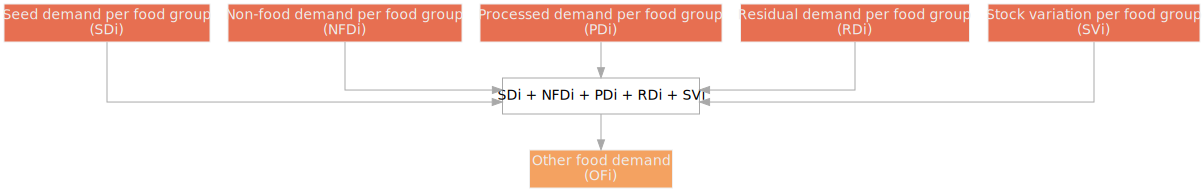

In [3]:
OFI_nodes = [
    {'type': 'variable',
     'unit': '1000 t',
     'id': 'OFi',
     'name': 'Other food demand',
     'in': ['SDi', 'NFDi', 'PDi', 'RDi', 'SVi'],
     'computation': {'name': 'SDi + NFDi + PDi + RDi + SVi',
                     'formula': lambda X: X['SDi'] + X['NFDi'] + X['PDi'] + X['RDi'] + X['SVi']}
     },
        {'type': 'input',
     'unit': '1000 t',
     'id': 'SDi',
     'name': 'Seed demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'NFDi',
     'name': 'Non-food demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'PDi',
     'name': 'Processed demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'RDi',
     'name': 'Residual demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'SVi',
     'name': 'Stock variation per food group',
     },
]

GraphModel(OFI_nodes).draw()

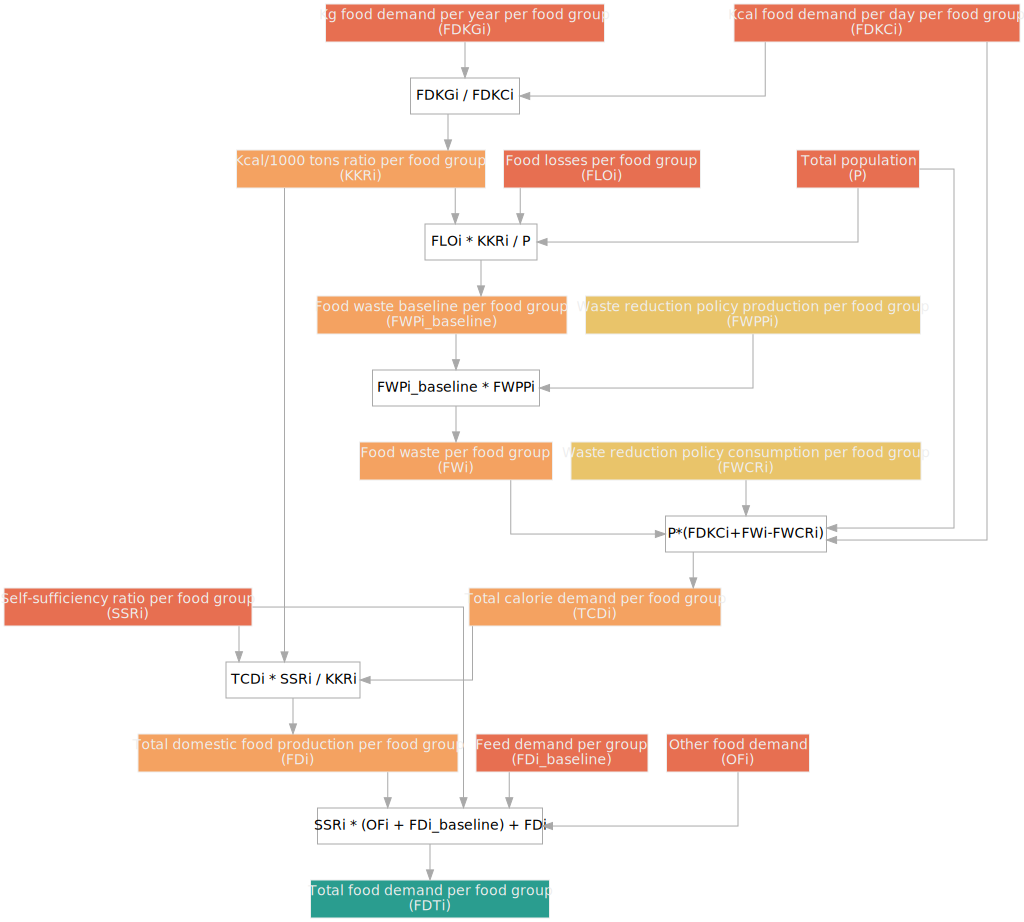

In [4]:


# FOOD DEMAND PER FOOD GROUP AGGREGATION

FDTi_nodes = [
    {'type': 'variable',
     'unit': 'kcal/day',
     'id': 'TCDi',
     'name': 'Total calorie demand per food group',
     'in': ['P', 'FWi', 'FWCRi', 'FDKCi'],
     'computation': {'name': 'P*(FDKCi+FWi-FWCRi)',
                     'formula': lambda X: X['P'] * (X['FDKCi'] + X['FWi'] / 365 - X['FWCRi'])}
     },
    {'type': 'parameter',
     'unit': 'kcal/cap/day',
     'id': 'FWCRi',
     'name': 'Waste reduction policy consumption per food group',
     },
    {'type': 'parameter',
     'id': 'FWPPi',
     'unit': '%',
     'name': 'Waste reduction policy production per food group',
     },
    {'type': 'variable',
     'unit': 'kcal/cap/day',
     'id': 'FWi',
     'name': 'Food waste per food group',
     'in': ['FWPi_baseline', 'FWPPi'],
     'computation': {'name': 'FWPi_baseline * FWPPi',
                     'formula': lambda X: X['FWPi_baseline'] * X['FWPPi'] * 1e-2}
     },
    {'type': 'variable',
     'unit': 'kcal/cap/day',
     'id': 'FWPi_baseline',
     'name': 'Food waste baseline per food group',
     'in': ['FLOi', 'P', 'KKRi'],
     'computation': {'name': 'FLOi * KKRi / P',
                     'formula': lambda X: X['FLOi'] * X['KKRi'] / X['P']}
     },
    {'type': 'input',
     'unit': 'x 1000 t',
     'id': 'FLOi',
     'name': 'Food losses per food group',
     },
    {'type': 'variable',
     'id': 'KKRi',
     'name': 'Kcal/1000 tons ratio per food group',
     'unit': 'Kcal/kg',
     'in': ['FDKGi', 'FDKCi'],
     'computation': {'name': 'FDKGi / FDKCi',
                     'formula': lambda X: X['FDKCi'] / (X['FDKGi'] * 1e-6)}
     },
    {'type': 'input',
     'unit': 'kg/capita/yr',
     'id': 'FDKGi',
     'name': 'Kg food demand per year per food group',
     },
    {'type': 'input',
     'unit': 'kcal/capita/day',
     'id': 'FDKCi',
     'name': 'Kcal food demand per day per food group',
     },
    {'type': 'input',
     'unit': 'capita',
     'id': 'P',
     'name': 'Total population',
     },
    {'type': 'input',
     'unit': '%',
     'id': 'SSRi',
     'name': 'Self-sufficiency ratio per food group',
     },


    {'type': 'variable',
     'unit': '1000 t',
     'id': 'FDi',
     'name': 'Total domestic food production per food group',
     'in': ['KKRi', 'SSRi', 'TCDi'],
     'computation': {'name': 'TCDi * SSRi / KKRi',
                     'formula': lambda X: X['TCDi'] * X['SSRi'] / X['KKRi'] * 365}  # to check
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FDi_baseline',
     'name': 'Feed demand per group',

     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'OFi',
     'name': 'Other food demand',
     },

    {'type': 'output',
     'id': 'FDTi',
     'name': 'Total food demand per food group',
     'unit': 'x 1000 tonne',
     'in': ['FDi', 'OFi', 'FDi_baseline', 'SSRi'],
     'computation': {'name': 'SSRi * (OFi + FDi_baseline) + FDi',
                     'formula': lambda X: X['SSRi'] * (X['OFi'] + X['FDi_baseline']) + X['FDi']}
     },
]

FDTi_model = GraphModel(FDTi_nodes)


FDTi_model.draw()

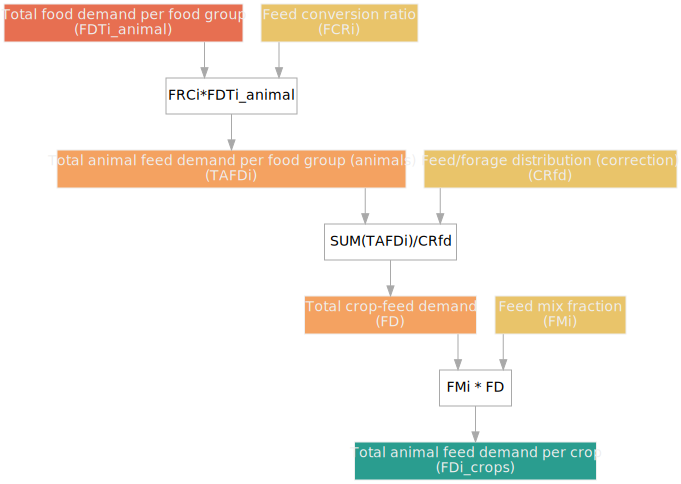

In [5]:
# ANIMAL FEED DEMAND PER FOOD GROUP

FDi_nodes = [
    # FDTi from the previous function
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FDTi_animal',
     'name': 'Total food demand per food group',

     },
    {'type': 'output',
     'unit': '1000 t',
     'id': 'FDi_crops',
     'name': 'Total animal feed demand per crop',
     'in': ['FMi', 'FD'],
     'computation': {'name': 'FMi * FD',
                     'formula': lambda X: X['FMi'] * X['FD']}
     },
    # Note1: The vector 'FMi' might contain animal-based feed (i.e. Milk) which caused a cycle error in my previous model; so we want to select only crops from the vector FMI
    {'type': 'parameter',
     'unit': '',
     'id': 'FMi',
     'name': 'Feed mix fraction',
     },
    # Note2: the CRfd is calculated for the year 2017; and assumed constant. For hungary the value of CRfd is: 1.58729526339088
    {'type': 'variable',
     'unit': '1ooo t',
     'id': 'FD',
     'name': 'Total crop-feed demand',
     'in': ['TAFDi', 'CRfd'],
     'computation': {'name': 'SUM(TAFDi)/CRfd',
                     'formula': lambda X: X['TAFDi'].sum() / X['CRfd']}
     },
    # CRfd is calculated with model data from  & assumed constant for simulated years (for now)
    {'type': 'parameter',
     'unit': '',
     'id': 'CRfd',
     'name': 'Feed/forage distribution (correction)',
     },

    {'type': 'parameter',
     'unit': 'kg DM feed/ kg EW',
     'id': 'FCRi',
     'name': 'Feed conversion ratio',
     },
    {'type': 'variable',
     'unit': 'kg',
     'id': 'TAFDi',
     'name': 'Total animal feed demand per food group (animals)',
     'in': ['FCRi', 'FDTi_animal'],
     'computation': {'name': 'FRCi*FDTi_animal',
                     'formula': lambda X: (X['FCRi'] * X['FDTi_animal'])}
     }
]

FDi_crops_Model = GraphModel(FDi_nodes)

FDi_crops_Model.draw()

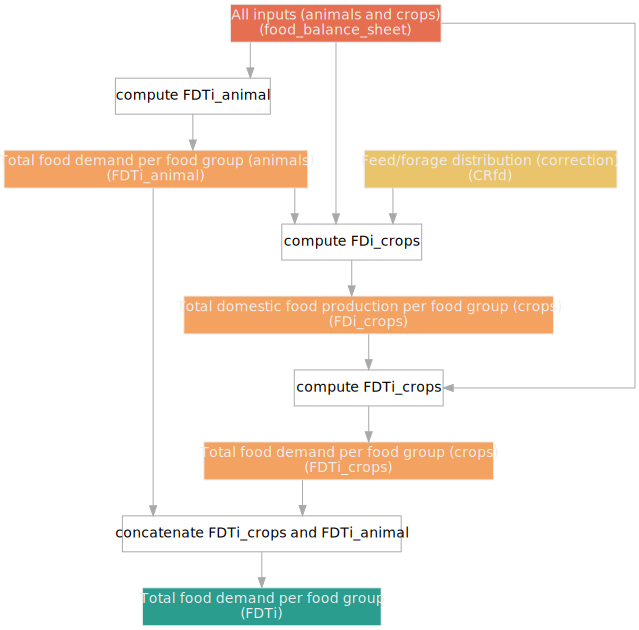

In [6]:

# FOOD DEMAND PER FOOD GROUP AGGREGATION with feed taken into account


def compute_FDTi_animal(X):
    X = X.copy()
    X['FDi_baseline'] = X['FDi']
    result = FDTi_model.run(X)['FDTi']
    return result.loc[animal_group]


def compute_FDTi_crops(X):
    X = X.copy()
    X['FDi_baseline'] = X['FDi_crops']
    result = FDTi_model.run(X)['FDTi']
    return result.loc[crop_group]


def compute_FDi_crops(X):
    X = X.copy()
    X['FDi_baseline'] = X['FDi']
    result = FDi_crops_Model.run(X)['FDi_crops']
    return result


full_FDTi_nodes = [
    {
        'id': 'food_balance_sheet',
        'name': 'All inputs (animals and crops)',
        'unit': '',
        'type': 'input',
    },
    {
        'id': 'FDTi_animal',
        'name': 'Total food demand per food group (animals)',
        'unit': '',
        'type': 'variable',
        'in': ['food_balance_sheet'],
        'computation': {'name': 'compute FDTi_animal', 'formula': lambda X: compute_FDTi_animal(X)}
    },
    {
        'id': 'FDi_crops',
        'name': 'Total domestic food production per food group (crops)',
        'unit': '',
        'type': 'variable',
        'in': ['food_balance_sheet', 'FDTi_animal', 'CRfd'],
        'computation': {'name': 'compute FDi_crops', 'formula': lambda X: compute_FDi_crops(X)}
    },
    {
        'id': 'FDTi_crops',
        'name': 'Total food demand per food group (crops)',
        'unit': '',
        'type': 'variable',
        'in': ['food_balance_sheet', 'FDi_crops'],
        'computation': {'name': 'compute FDTi_crops', 'formula': lambda X: compute_FDTi_crops(X)}
    },
    {
        'id': 'FDTi',
        'name': 'Total food demand per food group',
        'unit': '',
        'type': 'output',
        'in': ['FDTi_animal', 'FDTi_crops'],
        'computation': {'name': 'concatenate FDTi_crops and FDTi_animal', 'formula': lambda X: pd.concat([X['FDTi_animal'], X['FDTi_crops']])}
    },
    {
        'id': 'CRfd',
        'name': 'Feed/forage distribution (correction)',
        'unit': '',
        'type': 'parameter',
    },
]


model_full_FDTi = GraphModel(full_FDTi_nodes)

model_full_FDTi.draw()


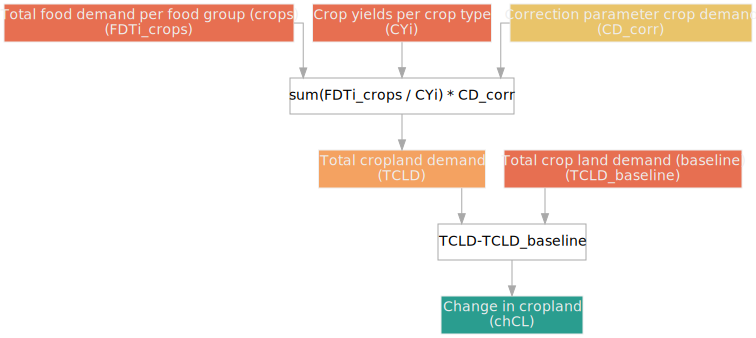

In [7]:


Crop_group2 = ['Cereals - Excluding Beer', 'Fruits - Excluding Wine', 'Oilcrops',
               'Pulses', 'Starchy Roots', 'Sugar Crops', 'Treenuts', 'Vegetables']


chCL_nodes = [
    # this is the value that is computed with the addition of animal feed (so the CRfd part)
    {'type': 'input',
     'id': 'FDTi_crops',
     'name': 'Total food demand per food group (crops)',
     'unit': '1000 tons',
     },
    {'type': 'input',
     'unit': 'hg/ha',
     'id': 'CYi',
     'name': 'Crop yields per crop type',
     },
    # this was TCL2017i
    {'type': 'input',
     'unit': 'ha',
     'id': 'TCLD_baseline',
     'name': 'Total crop land demand (baseline)',
     },
    {'type': 'parameter',
     'unit': '',
     'id': 'CD_corr',
     'name': 'Correction parameter crop demand',
     },
    {'type': 'variable',
     'id': 'TCLD',
     'name': 'Total cropland demand',
     'unit': 'ha',
     'in': ['FDTi_crops', 'CYi', 'CD_corr'],
     'computation': {'name': 'sum(FDTi_crops / CYi) * CD_corr',
                     'formula': lambda X: (X['FDTi_crops'] / X['CYi']).sum() * X['CD_corr'] * 1e7}
     },
    {'type': 'output',
     'id': 'chCL',
     'name': 'Change in cropland',
     'unit': '1000 ha',
     'in': ['TCLD', 'TCLD_baseline'],
     'computation': {'name': 'TCLD-TCLD_baseline',
                     'formula': lambda X: (X['TCLD'] - X['TCLD_baseline']) * 1e-5}
     }
]

chCL_model = GraphModel(chCL_nodes)

chCL_model.draw()

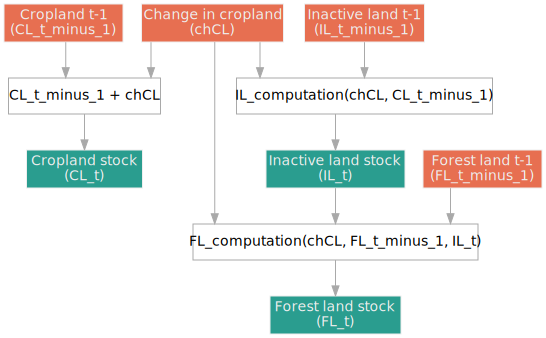

In [8]:


def FL(chCL, FL_t_minus_1, IL_t_minus_1):
    if (chCL > 0) and (IL_t_minus_1 - chCL < 0):
        return FL_t_minus_1 + IL_t_minus_1 - chCL
    else:
        return FL_t_minus_1


def IL(chCL, IL_t_minus_1):
    if (chCL > 0) and (IL_t_minus_1 - chCL < 0):
        return 0
    else:
        return IL_t_minus_1 - chCL


CH_IL_FL_nodes = [
    # from previous part
    {'type': 'input',
     'id': 'chCL',
     'name': 'Change in cropland',
     'unit': 'x 1000ha'
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'CL_t_minus_1',
     'name': 'Cropland t-1',
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'IL_t_minus_1',
     'name': 'Inactive land t-1',
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'FL_t_minus_1',
     'name': 'Forest land t-1',
     },
    {'type': 'output',
     'id': 'CL_t',
     'name': 'Cropland stock',
     'unit': 'x 1000ha',
     'in': ['chCL', 'CL_t_minus_1'],
     'computation': {'name': 'CL_t_minus_1 + chCL',
                     'formula': lambda X: X['chCL'] + X['CL_t_minus_1']}
     },
    {'type': 'output',
     'id': 'IL_t',
     'name': 'Inactive land stock',
     'unit': 'x 1000 ha',
     'in': ['chCL', 'IL_t_minus_1'],
     'computation': {'name': 'IL_computation(chCL, CL_t_minus_1) ',
                     'formula': lambda X: IL(X['chCL'], X['IL_t_minus_1'])}
     },
    {'type': 'output',
     'id': 'FL_t',
     'name': 'Forest land stock',
     'unit': 'x 1000ha',
     'in': ['chCL', 'FL_t_minus_1', 'IL_t'],
     'computation': {'name': 'FL_computation(chCL, FL_t_minus_1, IL_t)',
                     'formula': lambda X: FL(X['chCL'], X['FL_t_minus_1'], X['IL_t'])}
     },
]


model_CH_IL_FL = GraphModel(CH_IL_FL_nodes)



model_CH_IL_FL.draw()

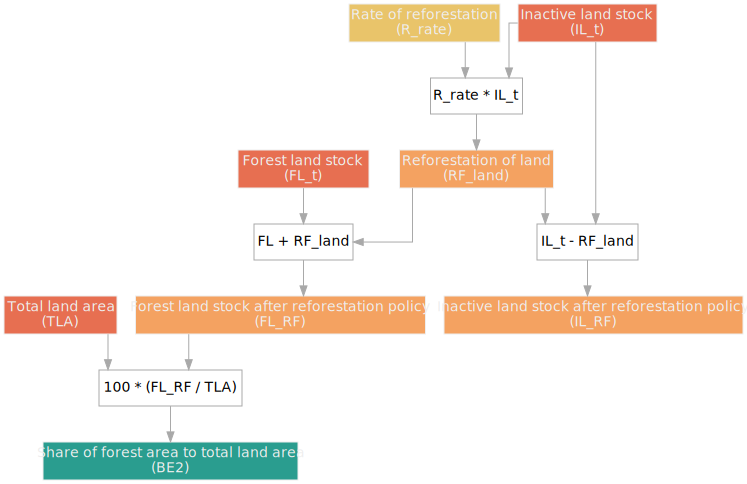

In [9]:
BE2_partial_nodes = [
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'TLA',
     'name': 'Total land area',
     },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'FL_t',
     'name': 'Forest land stock',
     },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'IL_t',
     'name': 'Inactive land stock',
     },
    {'type': 'parameter',
     'unit': '%',
     'id': 'R_rate',
     'name': 'Rate of reforestation',
     },
    {'type': 'variable',
     'id': 'RF_land',
     'name': 'Reforestation of land',
     'unit': 'x 1000ha',
     'in': ['R_rate', 'IL_t'],
     'computation': {'name': 'R_rate * IL_t',
                     'formula': lambda X: X['R_rate'] * 1e-2 * X['IL_t']}
     },
    {'type': 'variable',
     'id': 'FL_RF',
     'name': 'Forest land stock after reforestation policy',
     'unit': 'x 1000ha',
     'in': ['RF_land', 'FL_t'],
     'computation': {'name': 'FL + RF_land',
                     'formula': lambda X: X['FL_t'] + X['RF_land']}
     },
    {'type': 'variable',
     'id': 'IL_RF',
     'name': 'Inactive land stock after reforestation policy',
     'unit': 'x 1000ha',
     'in': ['RF_land', 'IL_t'],
     'computation': {'name': 'IL_t - RF_land',
                     'formula': lambda X: X['IL_t'] - X['RF_land']}
     },
    {'type': 'output',
     'id': 'BE2',
     'name': 'Share of forest area to total land area',
     'unit': '%',
     'in': ['TLA', 'FL_RF'],
     'computation': {'name': '100 * (FL_RF / TLA)',
                     'formula': lambda X: 1e2 * X['FL_RF'] / X['TLA']}
     },
]


model_BE2_partial = GraphModel(BE2_partial_nodes)

model_BE2_partial.draw()